#### **Einleitung:** 

In diesem Projekt wird ein maschinelles Lernmodell entwickelt, um Katzen und Hunde anhand von Bildern zu klassifizieren. Dies ist eine typische Aufgabe im Bereich der Bildverarbeitung und des maschinellen Lernens, die dazu dient, verschiedene Algorithmen und Techniken der künstlichen Intelligenz zu demonstrieren

- **Aufagben:**
    1.  Wie laden und bereiten Sie die Bilddaten für das Training vor?
        Hinweis: Überlegen Sie, wie Sie den Datensatz strukturieren und die Bilder in ein für das Modell geeignetes Format bringen können. Verwenden Sie ImageDataGenerator aus Keras, um die Bilder zu laden und zu normalisieren

    2. Wie wird die Architektur eines Convolutional Neural Network (CNN) für die Bildklassifizierung defeniert?
       Hinweis: Betrachten Sie die verschiedenen Schichten, die in einem CNN verwendet werden, wie Convolutional Layers, Pooling Layers, Flattening und Dense Layers. Beginnen Sie mit der Input-Schicht und bauen Sie das Netzwerk schrittweise auf.


    3. Überlegen Sie sich, welche Aktivierungsfunktionen und Optimierungsmethoden für dieses Modell geeignet sind? z.b [Relu, gelu](theorie.ipynb)
 
       
    4. Wie trainieren Sie das Modell und überwachen dessen Leistung während des Trainings?
      Nutzen Sie die fit-Methode des Modells, um es mit den Trainingsdaten zu trainieren. Verwenden Sie dabei auch Validierungsdaten, um die Leistung des Modells zu überwachen und frühzeitig zu erkennen, ob es über- oder unteranpasst.

    5. Wie evaluieren Sie die Leistung des trainierten Modells auf den Validierungsdaten?
      Hinweis: Nach dem Training können Sie die evaluate-Methode verwenden, um die Leistung des Modells zu testen und die Genauigkeit und den Verlust auf den Validierungsdaten zu messen.



#### **Problemstellung:**

Die Aufgabe besteht darin, ein Modell zu entwickeln, das in der Lage ist, Bilder von Katzen und Hunden zu unterscheiden. Dies erfordert das Sammeln und Vorverarbeiten von Daten, das Erstellen eines geeigneten Modells sowie die Bewertung und Optimierung der Modellleistung.

####  **Lösungssatz:** 

Das Ziel ist es, ein Convolutional Neural Network (CNN) zu implementieren, das auf einem Trainingsdatensatz von Katzen- und Hundebildern trainiert wird. Das Modell soll anschließend in der Lage sein, die Klassifizierung mit hoher Genauigkeit auf einem Testdatensatz durchzuführen.

#### **Aufgabenbearbeitung:**

#### Anforderungen: 


- Ein Datensatz mit Katzen- und Hundebildern (z.B. Kaggle Dogs vs. Cats Dataset).
- Python und Bibliotheken wie TensorFlow oder PyTorch, NumPy, Pandas, Matplotlib.
- Grundkenntnisse in maschinellem Lernen und Deep Learning.

#### Modelbildung: 

- Laden des Datensatzes und Aufteilen in Trainings- und Testdaten.
- Bildvorverarbeitung: Größenanpassung, Normalisierung und Augmentation der Bilder.
- Erstellen eines CNN-Modells mit mehreren Convolutional-, Pooling- und Dense-Schichten.

#### **Algorithmierung/Entwurf:**

1. Datenverabeitung: 
    - Laden der Bilddaten und Konvertierung in ein für das Modell geeignetes Format.
    - Aufteilung der Daten in Trainings- und Validierungssätze.
    - Anwendung von Datenaugmentationstechniken, um die Vielfalt der Trainingsdaten zu erhöhen.

2. Modelarchitektur:
   - Definition der CNN-Architektur mit geeigneten Schichten (Convolutional, Pooling, Fully Connected).
   - Verwendung von Aktivierungsfunktionen wie ReLU und Softmax.
   - Kompilierung des Modells mit einem geeigneten Optimierer (z.B. Adam) und einer Verlustfunktion (z.B. categorical crossentropy).

3. Training und Evaluierung:
   - Training des Modells mit dem Trainingsdatensatz.
   - Überwachung der Modellleistung anhand des Validierungsdatensatzes.
   - Anpassung von Hyperparametern und Modellarchitektur basierend auf den Ergebnissen.

#### **Implementierung:** 


### 1. **Nötige Bibliotheken herunterladen und Setup einrichten**

In [12]:
import tensorflow as tf
import os


In [13]:
#!pip install tensorflow  
#!pip install tensorflow-gpu
#!pip install opencv-python 
#!pip install matplotlib
#!pip install tensorflow_addons



In [14]:
 # Speicherplatz Fehler vermeiden
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)
    

### **2. Datensatz bereinigen** 
**(kleine Bilder entfernen)**

In [15]:
# import cv2
# import imghdr
# data_dir = 'Pythonlernmedien/Problembeispielen/data3' 
# bild_exts = ['jpeg','jpg', 'bmp', 'png']
# for image_klasse in os.listdir(data_dir): 
#     for bild in os.listdir(os.path.join(data_dir, image_klasse)):
#         bild_path = os.path.join(data_dir, image_klasse, bild)
#         try: 
#             bild = cv2.imread(bild_path)
#             tip = imghdr.what(bild_path)
#             if tip not in bild_exts: 
#                 print('Bild in exts nicht vorhanden {}'.format(bild_path))
#                 os.remove(bild_path)
#         except Exception as e: 
#             print('Bild fehlerhaft {}'.format(bild_path))
#             # os.remove(image_path)


### **3. Bilder hochladen**

In [16]:
import numpy as np
from matplotlib import pyplot as plt

data = tf.keras.utils.image_dataset_from_directory('Pythonlernmedien/Problembeispielen/data3')

data_iterator = data.as_numpy_iterator()
#batch = data_iterator.next()


Found 23650 files belonging to 2 classes.


### 4. **Daten(Bilder) skalieren** 

In [17]:
data = data.map(lambda x,y: (x/255, y)) #x -> Bilder,  y-> Beschriftung (Target)







In [18]:
scaled_iterator = data.as_numpy_iterator()#.next()#[0].max()
#batch[0].max()




In [19]:
batch = scaled_iterator.next()

In [20]:
batch[0].max(), batch[0].min()

(1.0, 0.0)

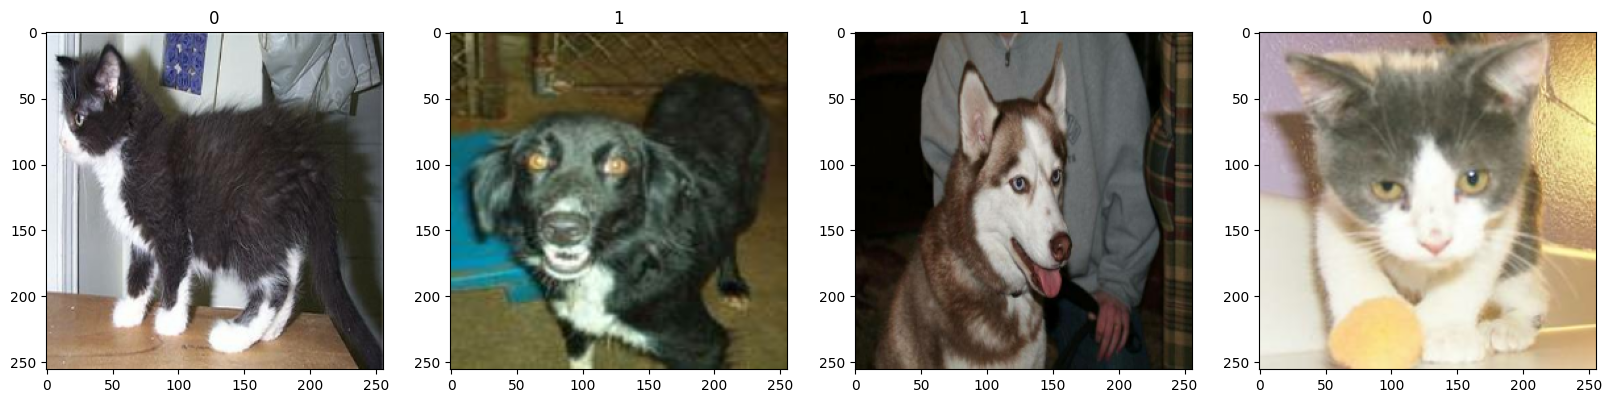

In [21]:

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, bild in enumerate(batch[0][:4]):
    ax[idx].imshow(bild)
    ax[idx].title.set_text(batch[1][idx])
# 0 = Katze 
# 1 = Hund

### 5.**Daten Aufteilen in :  Train-, Validation- und Test-splits:** 

In [22]:
# size in Batches angegeben. Ein Batch entählt 32
train_size = int(len(data)*.7) # 70% des Datensatzes für Training
val_size = int(len(data)*.2) # 20% des Datensatzes für Validation
test_size = int(len(data)*.1) #10% des Datensatzes für Testing
#print(train_size,val_size,test_size)

train = data.take(train_size) # nimmt "Train-size" für Training also 70% der bilder
val = data.skip(train_size).take(val_size)# val skippt die 70% von train und nimmt dann 20 der restlichen Bilder für Validation
test = data.skip(train_size+val_size).take(test_size) # test skippt train und val und nimmt die restlichen 10% für Testing


### 6. **Deep Learning Model bauen:** 

In [28]:

#train
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
model = Sequential() # Name des Modells ist "model"
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
# model.add(MaxPooling2D())
# model.add(Conv2D(32, (3,3), 1, activation='relu'))
# model.add(MaxPooling2D())
# model.add(Conv2D(16, (3,3), 1, activation='relu'))
# model.add(MaxPooling2D())
model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# #model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
# model.add(layers.Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])



model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1032256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │       1,032,257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,032,705 (3.94 MB)

 Trainable params: 1,032,705 (3.94 MB)

 Non-trainable params: 0 (0.00 B)

In [1]:

# datagen = ImageDataGenerator(
#     rotation_range=40,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest',
#     validation_split=0.2  # Add validation split
# )

# # Assuming you have a directory structure for training images
# train_data_dir = 'Pythonlernmedien/Problembeispielen/data3'

# # Create generators
# train_generator = datagen.flow_from_directory(
#     train_data_dir,
#     target_size=(256, 256),
#     batch_size=32,
#     class_mode='binary',
#     subset='training'  # Set as training data
# )

# validation_generator = datagen.flow_from_directory(
#     train_data_dir,
#     target_size=(256, 256),
#     batch_size=32,
#     class_mode='binary',
#     subset='validation'  # Set as validation data
# )
# batch[1].max(), batch[1].min()

NameError: name 'ImageDataGenerator' is not defined

### 7. **Deep Learning Model trainineren (model.fit):** 

In [29]:
logdir='Pythonlernmedien/Problembeispielen/logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir) # um zwischenzeitliche Fortschritte des Modells während des Trainings zu speicherm
# Nützlich zum plotten der Daten . 
model_Verlauf = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback]) 


Epoch 1/10
518/518 ━━━━━━━━━━━━━━━━━━━━ 99s 187ms/step - accuracy: 0.5887 - loss: 3.2022 - val_accuracy: 0.6871 - val_loss: 0.6114
Epoch 2/10
518/518 ━━━━━━━━━━━━━━━━━━━━ 79s 152ms/step - accuracy: 0.7134 - loss: 0.5736 - val_accuracy: 0.6909 - val_loss: 0.6002
Epoch 3/10
518/518 ━━━━━━━━━━━━━━━━━━━━ 78s 151ms/step - accuracy: 0.7808 - loss: 0.4711 - val_accuracy: 0.6791 - val_loss: 0.6282
Epoch 4/10
518/518 ━━━━━━━━━━━━━━━━━━━━ 80s 155ms/step - accuracy: 0.8537 - loss: 0.3505 - val_accuracy: 0.6710 - val_loss: 0.6642
Epoch 5/10
518/518 ━━━━━━━━━━━━━━━━━━━━ 79s 153ms/step - accuracy: 0.9025 - loss: 0.2508 - val_accuracy: 0.6651 - val_loss: 0.7404
Epoch 6/10
518/518 ━━━━━━━━━━━━━━━━━━━━ 81s 156ms/step - accuracy: 0.9468 - loss: 0.1659 - val_accuracy: 0.6843 - val_loss: 0.8115
Epoch 7/10
518/518 ━━━━━━━━━━━━━━━━━━━━ 80s 154ms/step - accuracy: 0.9767 - loss: 0.0945 - val_accuracy: 0.6784 - val_loss: 0.9031
Epoch 8/10
518/518 ━━━━━━━━━━━━━━━━━━━━ 80s 155ms/step - accuracy: 0.9863 - loss: 0

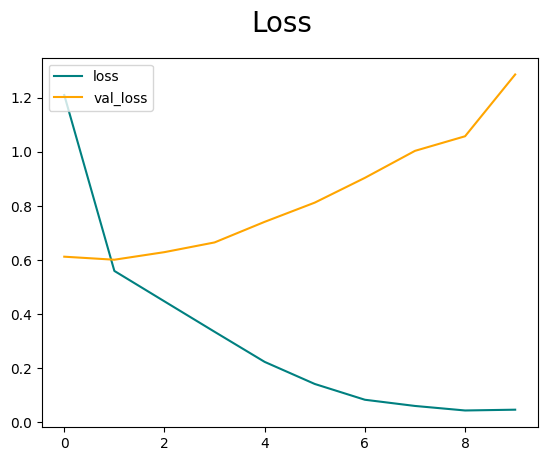

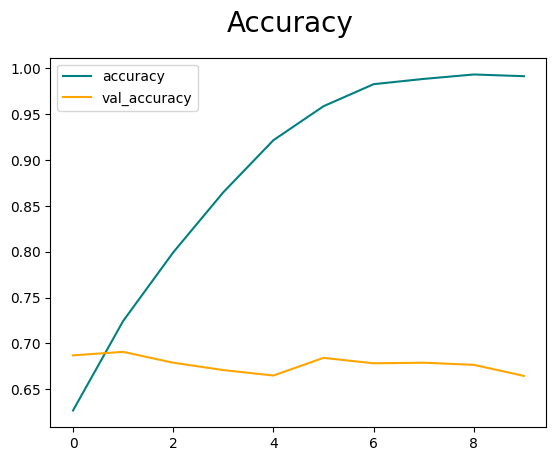

In [30]:
### 7. ** Performance des Modells plotten**



fig = plt.figure()
plt.plot(model_Verlauf.history['loss'], color='teal', label='loss')
plt.plot(model_Verlauf.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

fig = plt.figure()
plt.plot(model_Verlauf.history['accuracy'], color='teal', label='accuracy')
plt.plot(model_Verlauf.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()


### 8. ** Evaluation des Modells : **

In [31]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()
for batch in test.as_numpy_iterator(): 
    X, y = batch
    ydach = model.predict(X)
    pre.update_state(y, ydach)
    re.update_state(y, ydach)
    acc.update_state(y, ydach)
    
print(f'{pre.result()}, {re.result()}, {acc.result()}')

#print ("->", batch,, batch.min())

#print (batch[0].min(), batch[0].max())




1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 795ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━

### 9. Testing mit anderen Bildren : 


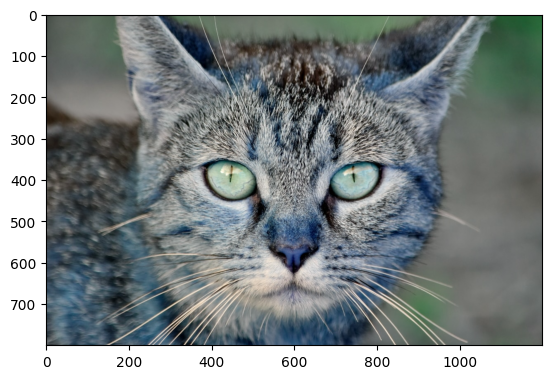

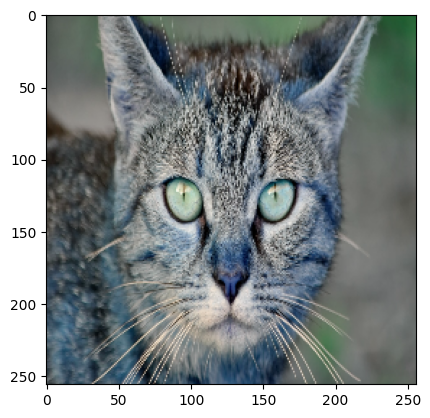

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
im Bild ist eine Katze zu sehen


array([[0.00021589]], dtype=float32)

In [47]:
import cv2

    
bild_Web = cv2.imread('Pythonlernmedien/Problembeispielen/test18.jpg')
plt.imshow(bild_Web)
plt.show()

resizezbild = tf.image.resize(bild_Web, (256,256))
plt.imshow(resizezbild.numpy().astype(int))
plt.show()

ydach = model.predict(np.expand_dims(resizezbild/255, 0))
ydach
if ydach > 0.50: 
    print(f'im Bild ist ein Hund zu sehen')
else:
    print(f'im Bild ist eine Katze zu sehen')



ydach

In [194]:
'''
from tensorflow.keras.models import save_model, load_model
from tensorflow.keras.models import load_model
save_model(model, 'my_model.keras')
new_model = load_model('my_model.keras')
#array([[0.90297127]], dtype=float32)
#rray([[0.9999443]], dtype=float32)
'''

C:\Users\yahya\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 22 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))



```markdown
# Funktionsbeschreibungen : 

## Verwendete Befehle und Funktionen

### print
Ausgabetext auf der Konsole anzeigen.

**Schreibweise und Beispiel:**
```python
print("Hallo, Welt!")
# Ausgabe: Hallo, Welt!
```

### map
Eine Funktion auf jedes Element einer Liste anwenden.

**Schreibweise und Beispiel:**
```python
def quadrat(x):
    return x * x

zahlen = [1, 2, 3, 4]
ergebnis = list(map(quadrat, zahlen))
print(ergebnis)
# Ausgabe: [1, 4, 9, 16]
```

### len
Die Länge eines Objekts (z.B. Liste) zurückgeben.

**Schreibweise und Beispiel:**
```python
liste = [1, 2, 3, 4]
print(len(liste))
# Ausgabe: 4
```

### add
Eine Operation, die zwei Werte addiert.

**Schreibweise und Beispiel:**
```python
import numpy as np

a = np.array([1, 2])
b = np.array([3, 4])
ergebnis = np.add(a, b)
print(ergebnis)
# Ausgabe: [4, 6]
```

### int
Eine Zahl in einen Ganzzahlwert umwandeln.

**Schreibweise und Beispiel:**
```python
zahl = 3.14
ganzzahl = int(zahl)
print(ganzzahl)
# Ausgabe: 3
```

### min
Den kleinsten Wert in einer Liste oder einem Array finden.

**Schreibweise und Beispiel:**
```python
zahlen = [1, 2, 3, 4]
print(min(zahlen))
# Ausgabe: 1
```

### max
Den größten Wert in einer Liste oder einem Array finden.

**Schreibweise und Beispiel:**
```python
zahlen = [1, 2, 3, 4]
print(max(zahlen))
# Ausgabe: 4
```

### numpy
Eine Bibliothek für wissenschaftliches Rechnen mit Python, die Unterstützung für große, mehrdimensionale Arrays und Matrizen bietet.

### array
Eine Funktion aus der numpy-Bibliothek, um ein Array zu erstellen.

**Schreibweise und Beispiel:**
```python
import numpy as np

array = np.array([1, 2, 3, 4])
print(array)
# Ausgabe: [1 2 3 4]
```

### astype
Eine Methode, um den Datentyp eines Arrays zu ändern.

**Schreibweise und Beispiel:**
```python
import numpy as np

array = np.array([1, 2, 3, 4], dtype=float)
print(array)
# Ausgabe: [1. 2. 3. 4.]
```

### imshow
Eine Funktion aus der Matplotlib-Bibliothek, um ein Bild anzuzeigen.

**Schreibweise und Beispiel:**
```python
import matplotlib.pyplot as plt
import numpy as np

bild = np.random.rand(100, 100)
plt.imshow(bild, cmap='gray')
plt.show()
```

### resize
Eine Methode, um die Größe eines Bildes oder Arrays zu ändern.

**Schreibweise und Beispiel:**
```python
import numpy as np

array = np.array([1, 2, 3, 4, 5, 6])
neues_array = np.resize(array, (2, 3))
print(neues_array)
# Ausgabe: [[1 2 3]
#           [4 5 6]]
```

### join
Eine Methode, um eine Liste von Strings zu einem einzelnen String zu verbinden.

**Schreibweise und Beispiel:**
```python
liste = ['Hallo', 'Welt']
verbunden = ' '.join(liste)
print(verbunden)
# Ausgabe: Hallo Welt
```

### format
Eine Methode, um einen String zu formatieren.

**Schreibweise und Beispiel:**
```python
name = "Welt"
ausgabe = "Hallo, {}!".format(name)
print(ausgabe)
# Ausgabe: Hallo, Welt!
```

### enumerate
Eine Funktion, die eine aufzählbare Liste von Tuple (Index, Wert) zurückgibt.

**Schreibweise und Beispiel:**
```python
liste = ['a', 'b', 'c']
for index, wert in enumerate(liste):
    print(index, wert)
# Ausgabe:
# 0 a
# 1 b
# 2 c
```

### next
Eine Funktion, um das nächste Element eines Iterators zurückzugeben.

**Schreibweise und Beispiel:**
```python
iterator = iter([1, 2, 3])
print(next(iterator))
# Ausgabe: 1
```

### listdir
Listet die Dateien in einem Verzeichnis auf.

**Schreibweise und Beispiel:**
```python
import os

dateien = os.listdir('.')
print(dateien)
```

### remove
Eine Funktion, um eine Datei zu löschen.

**Schreibweise und Beispiel:**
```python
import os

os.remove('datei.txt')
```

### Conv2D
Eine Schicht für ein Convolutional Neural Network (CNN) in Keras.

**Schreibweise und Beispiel:**
```python
from tensorflow.keras.layers import Conv2D

conv = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')
```

### MaxPooling2D
Eine Schicht für die Max-Pooling-Operation in einem CNN.

**Schreibweise und Beispiel:**
```python
from tensorflow.keras.layers import MaxPooling2D

pooling = MaxPooling2D(pool_size=(2, 2))
```

### Flatten
Eine Schicht, um mehrdimensionale Eingaben zu einer eindimensionalen Ausgabe abzuflachen.

**Schreibweise und Beispiel:**
```python
from tensorflow.keras.layers import Flatten

flatten = Flatten()
```

### Dense
Eine vollständig verbundene Schicht in einem neuronalen Netzwerk.

**Schreibweise und Beispiel:**
```python
from tensorflow.keras.layers import Dense

dense = Dense(units=128, activation='relu')
```

### Dropout
Eine Schicht, die Dropout-Regularisierung in einem neuronalen Netzwerk durchführt.

**Schreibweise und Beispiel:**
```python
from tensorflow.keras.layers import Dropout

dropout = Dropout(rate=0.5)
```

### Sequential
Ein sequentielles Modell in Keras, bei dem die Schichten linear aufeinander folgen.

**Schreibweise und Beispiel:**
```python
from tensorflow.keras.models import Sequential

modell = Sequential()
```

### compile
Eine Methode, um das Keras-Modell zu kompilieren.

**Schreibweise und Beispiel:**
```python
modell.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
```

### fit
Eine Methode, um das Keras-Modell zu trainieren.

**Schreibweise und Beispiel:**
```python
modell.fit(x_train, y_train, epochs=10)
```

### predict
Eine Methode, um Vorhersagen mit dem trainierten Keras-Modell zu machen.

**Schreibweise und Beispiel:**
```python
vorhersagen = modell.predict(x_test)
```

### save_model
Eine Methode, um das trainierte Modell zu speichern.

**Schreibweise und Beispiel:**
```python
from tensorflow.keras.models import save_model

save_model(modell, 'modell.h5')
```

### load_model
Eine Methode, um ein gespeichertes Modell zu laden.

**Schreibweise und Beispiel:**
```python
from tensorflow.keras.models import load_model

modell = load_model('modell.h5')
```

### BinaryCrossentropy
Ein Verlustfunktion für binäre Klassifizierungsprobleme.

**Schreibweise und Beispiel:**
```python
from tensorflow.keras.losses import BinaryCrossentropy

verlust = BinaryCrossentropy()
```

### BinaryAccuracy
Eine Metrik, um die Genauigkeit bei binären Klassifizierungsproblemen zu messen.

**Schreibweise und Beispiel:**
```python
from tensorflow.keras.metrics import BinaryAccuracy

genauigkeit = BinaryAccuracy()
```

### Precision
Eine Metrik, um die Präzision bei Klassifizierungsproblemen zu messen.

**Schreibweise und Beispiel:**
```python
from tensorflow.keras.metrics import Precision

präzision = Precision()
```

### Recall
Eine Metrik, um den Rückruf bei Klassifizierungsproblemen zu messen.

**Schreibweise und Beispiel:**
```python
from tensorflow.keras.metrics import Recall

rückruf = Recall()
```

### ImageDataGenerator
Eine Klasse, um Bilder für das Training von Keras-Modellen zu generieren.

**Schreibweise und Beispiel:**
```python
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datengenerator = ImageDataGenerator(rescale=1./255)
```

### flow_from_directory
Eine Methode, um Bilder aus einem Verzeichnis zu laden und für das Training vorzubereiten.

**Schreibweise und Beispiel:**
```python
train_data = datengenerator.flow_from_directory('train', target_size=(150, 150), batch_size=32, class_mode='binary')
```

### image_dataset_from_directory
Eine Methode, um ein Bilddatensatz aus einem Verzeichnis zu erstellen.

**Schreibweise und Beispiel:**
```python
import tensorflow as tf

dataset = tf.keras.preprocessing.image_dataset_from_directory('verzeichnis')
```

### TensorBoard
Ein Werkzeug zur Visualisierung von TensorFlow-Grafiken und anderen Metriken.

### subplots
Eine Funktion aus Matplotlib,